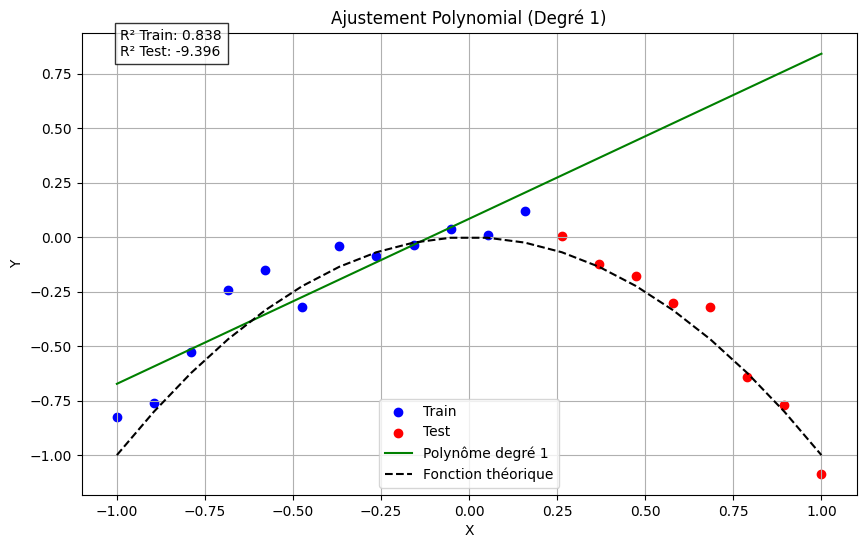

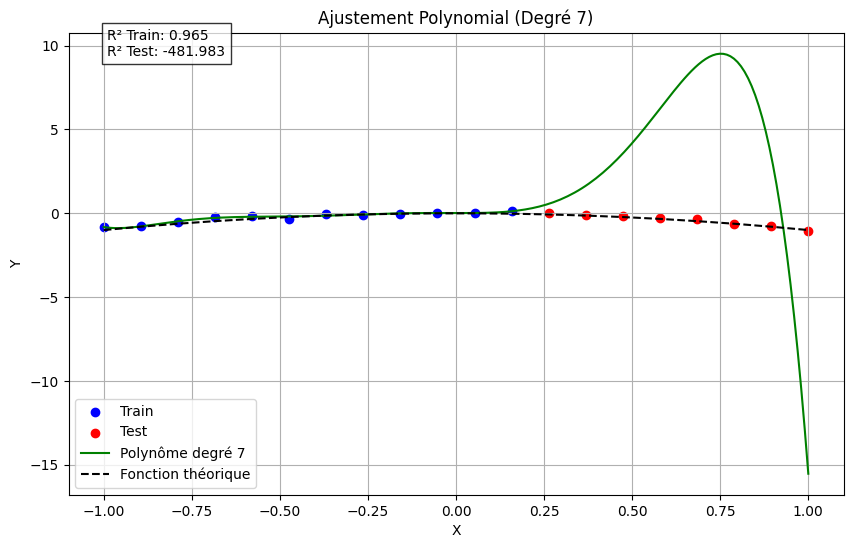

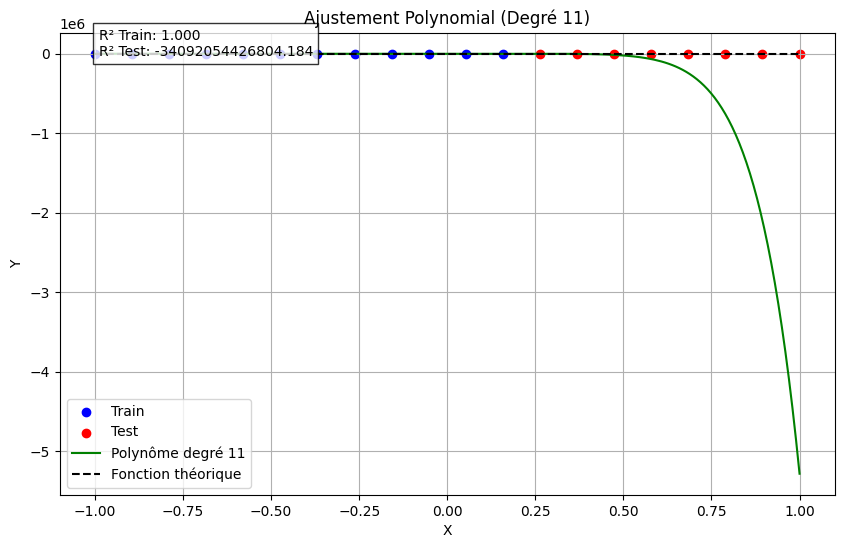

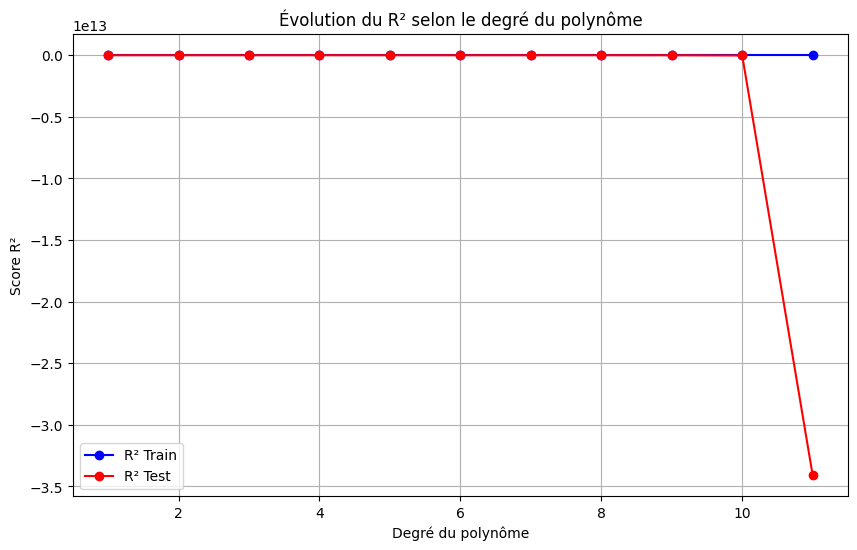

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Création du dataset
np.random.seed(0)
x = np.linspace(-1, 1, 20)  # 20 points entre -1 et 1
y = -x**2 + np.random.normal(0, 0.1, len(x))  # Fonction quadratique avec bruit

# Reshape pour sklearn
X = x.reshape(-1, 1)

# Division train/test
X_train = X[:12]
y_train = y[:12]
X_test = X[12:]
y_test = y[12:]

def polynomial_fit(degree, X_train, y_train):
    """
    Crée et entraîne un modèle polynomial
    """
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    return poly_features, model

def plot_polyfit(degree, X_train, X_test, y_train, y_test):
    """
    Visualise l'ajustement polynomial
    """
    poly_features, model = polynomial_fit(degree, X_train, y_train)
    
    # Points pour la courbe
    X_smooth = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    X_smooth_poly = poly_features.transform(X_smooth)
    y_smooth = model.predict(X_smooth_poly)
    
    # Calcul R²
    X_train_poly = poly_features.transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    r2_train = r2_score(y_train, model.predict(X_train_poly))
    r2_test = r2_score(y_test, model.predict(X_test_poly))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='red', label='Test')
    plt.plot(X_smooth, y_smooth, 'g-', label=f'Polynôme degré {degree}')
    plt.plot(X, -X.flatten()**2, 'k--', label='Fonction théorique')
    
    plt.title(f'Ajustement Polynomial (Degré {degree})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    
    plt.text(0.05, 0.95, f'R² Train: {r2_train:.3f}\nR² Test: {r2_test:.3f}', 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()

# Test avec différents degrés
degrees = [1, 7, 11]
for degree in degrees:
    plot_polyfit(degree, X_train, X_test, y_train, y_test)

# Analyse de l'évolution du R²
degrees_range = range(1, 12)
r2_trains = []
r2_tests = []

for degree in degrees_range:
    poly_features, model = polynomial_fit(degree, X_train, y_train)
    
    X_train_poly = poly_features.transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    r2_trains.append(r2_score(y_train, model.predict(X_train_poly)))
    r2_tests.append(r2_score(y_test, model.predict(X_test_poly)))

plt.figure(figsize=(10, 6))
plt.plot(degrees_range, r2_trains, 'bo-', label='R² Train')
plt.plot(degrees_range, r2_tests, 'ro-', label='R² Test')
plt.xlabel('Degré du polynôme')
plt.ylabel('Score R²')
plt.title('Évolution du R² selon le degré du polynôme')
plt.legend()
plt.grid(True)
plt.show()


On observe :
- Le sous-apprentissage avec le degré 1
- L'ajustement correct avec le degré 7
- Le surapprentissage avec le degré 11

- Le graphique final illustre clairement le compromis biais-variance avec :
- L'amélioration continue du R² sur les données d'entraînement
- La dégradation du R² sur les données de test à partir d'un certain degré